# Handwritten Digits Classification
### Shan Wang
### 15 October, 2022

In this lab, you'll learn to use tools from Tensorflow to label images of digit! The data you're using, [MNIST](http://yann.lecun.com/exdb/mnist/), consists of images of handwritten digit. The digits have been size-normalized and centered in a fixed-size image. 

## 1 Loading and Preprocessing the Data Set
Loading MNIST and splitting into training and testing datasets

In [2]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

ModuleNotFoundError: No module named 'tensorflow'

Reshaping image dimensions:

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Normalization:

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1)  
x_test = tf.keras.utils.normalize(x_test, axis=1) 

## 2 Building a Convolutional Neural Network

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D

#实例化一个Sequential类，使用.add()函数进行各个层的堆叠
model = Sequential()
#通过设置，第一层`Conv2D()`创建了一个卷积核，与2D输入数据进行卷积以产生输出的张量，可接受`input_shape`的参数
model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='tanh', input_shape=(28,28,1)))
#`AveragePooling2D()`创建2D输入的平均池化层
model.add(AveragePooling2D())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='tanh'))
model.add(AveragePooling2D())
#`Flatten()`用于将输入层的数据压成一维的数据，一般用在卷积层和全连接层之间（因为全连接层只能接收一维数据）
model.add(Flatten())
model.add(Dense(units=128, activation='tanh'))
model.add(Dense(units=10, activation = 'softmax'))
#模型总结
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d (AveragePo (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               51328     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
#Model Compilation：通过调用 compile 方法配置该模型的学习流程
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

`optimizer`：此对象会指定训练过程。从 `tf.train` 模块向其传递优化器实例，例如 `AdamOptimizer`、`RMSPropOptimizer` 或 `GradientDescentOptimizer`。
`loss`：要在优化期间最小化的函数。常见选择包括均方误差 `(mse)`、`categorical_crossentropy` 和 `binary_crossentropy`。损失函数由名称或通过从 `tf.keras.losses` 模块传递可调用对象来指定。
`metrics`：用于监控训练。它们是 `tf.keras.metrics` 模块中的字符串名称或可调用对象。

## 3 Fitting the model

In [ ]:
model.fit(x_train, y_train, 
          epochs=5, 
          validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.5175 - accuracy: 0.8443 - val_loss: 0.1494 - val_accuracy: 0.9546
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1409 - accuracy: 0.9577 - val_loss: 0.0982 - val_accuracy: 0.9711
Epoch 3/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0895 - accuracy: 0.9720 - val_loss: 0.0696 - val_accuracy: 0.9786
Epoch 4/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0652 - accuracy: 0.9806 - val_loss: 0.0636 - val_accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0499 - accuracy: 0.9854 - val_loss: 0.0621 - val_accuracy: 0.9792


## 4 Model prediction

In [ ]:
import numpy as np

predictions = model.predict(x_test)
print(np.argmax(predictions[100]))

6


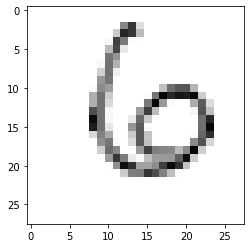

In [ ]:
#对'x_test'的图像数据可视化
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_test[100],cmap=plt.cm.binary)
plt.show()